# Heart Disease Prediction Using Machine Learning Classification Models

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [2]:
%matplotlib inline

In [3]:
# Load the dataset
data = pd.read_csv('heart.csv' )

In [4]:
# Copy the original dataset
encoded_data = data.copy()

# Binary Columns
binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking','Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Apply label encoding
binary_encoder =  LabelEncoder()
for col in binary_columns:
    encoded_data[col] = binary_encoder.fit_transform(encoded_data[col])
encoded_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0


In [5]:
# Ordinal Columns
ordinal_columns = ['GenHealth', 'AgeCategory' ]

# Order for ordinal columns
GenHealth = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
AgeCategory =['18-24', '25-29', '30-34', '35-39', '40-44', '45-49','50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']


# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[GenHealth, AgeCategory])
encoded_data[ordinal_columns] = ordinal_encoder.fit_transform(encoded_data[ordinal_columns])
encoded_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7.0,White,Yes,1,3.0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12.0,White,No,1,3.0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9.0,White,Yes,1,1.0,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11.0,White,No,0,2.0,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4.0,White,No,1,3.0,8.0,0,0,0


In [6]:
# Nominal columns
nominal_columns = ['Race', 'Diabetic']

# Apply OneHot encoding
encoded_data = pd.get_dummies(encoded_data, columns=nominal_columns).astype(int)
encoded_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16,1,0,0,3,30,0,0,7,...,0,0,0,0,0,1,0,0,1,0
1,0,20,0,0,1,0,0,0,0,12,...,0,0,0,0,0,1,1,0,0,0
2,0,26,1,0,0,20,30,0,1,9,...,0,0,0,0,0,1,0,0,1,0
3,0,24,0,0,0,0,0,0,0,11,...,0,0,0,0,0,1,1,0,0,0
4,0,23,0,0,0,28,0,1,0,4,...,0,0,0,0,0,1,1,0,0,0


In [7]:
# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# the correlation of each variable with 'HeartDisease'
heart_disease_correlation = correlation_matrix['HeartDisease'].sort_values(ascending=False)

heart_disease_correlation

HeartDisease                           1.000000
AgeCategory                            0.233432
DiffWalking                            0.201258
Stroke                                 0.196835
Diabetic_Yes                           0.183072
PhysicalHealth                         0.170721
KidneyDisease                          0.145197
Smoking                                0.107764
SkinCancer                             0.093317
Sex                                    0.070040
BMI                                    0.051628
Asthma                                 0.041444
Race_White                             0.040121
MentalHealth                           0.028591
Diabetic_No, borderline diabetes       0.016182
Race_American Indian/Alaskan Native    0.008547
SleepTime                              0.008327
Race_Other                            -0.003039
Race_Black                            -0.010156
Diabetic_Yes (during pregnancy)       -0.013930
Race_Asian                            -0

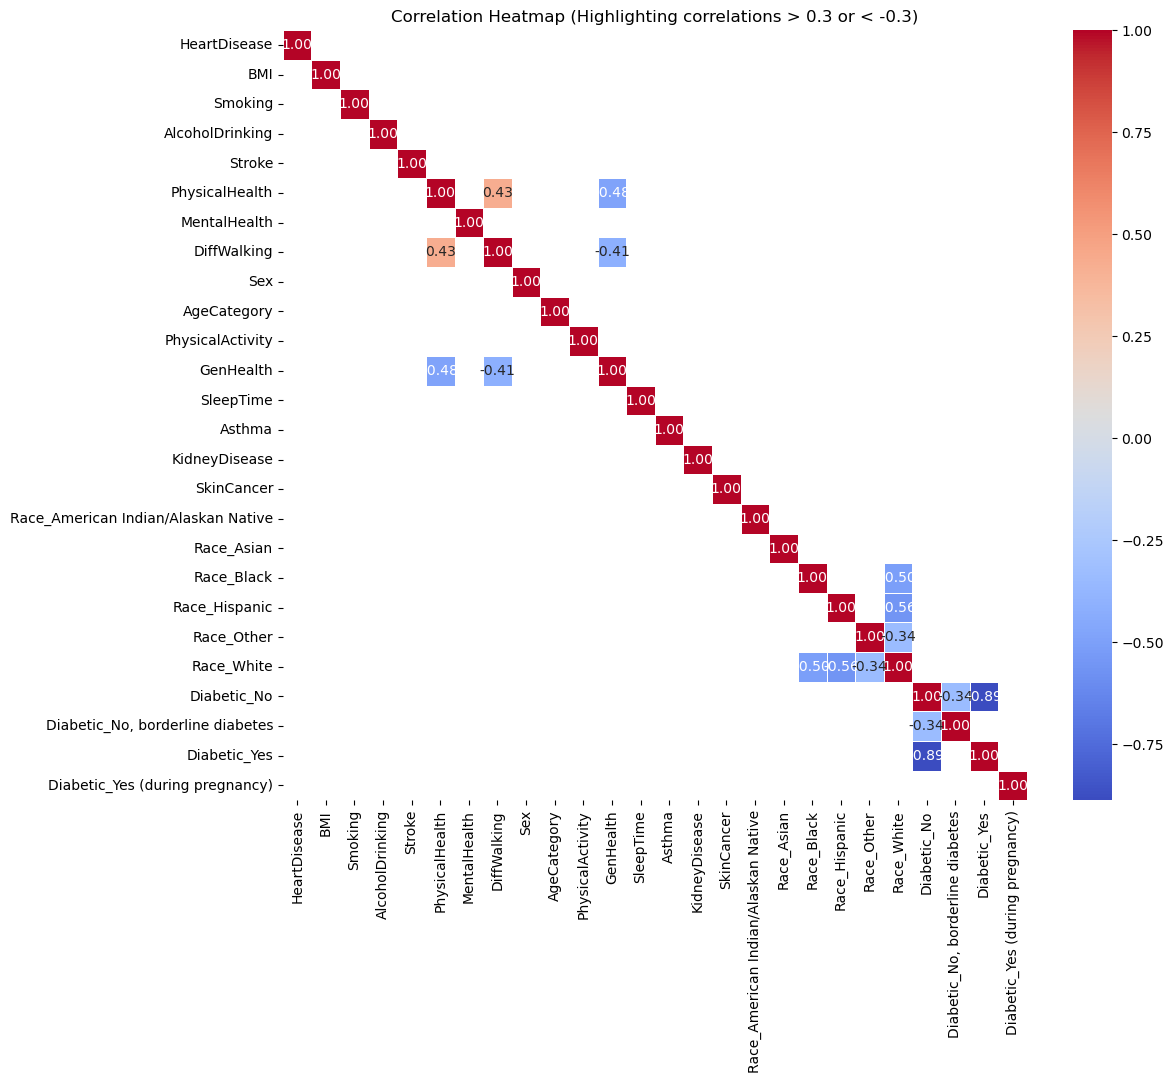

In [8]:
# Create a mask to highlight correlations above 0.3 or below -0.3
mask = (correlation_matrix > 0.3) | (correlation_matrix < -0.3)

# Plotting the heatmap to visualize the correlation between variables
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", mask=~mask)
plt.title('Correlation Heatmap (Highlighting correlations > 0.3 or < -0.3)')
plt.show()

In [9]:
print(encoded_data.columns.tolist())
print(f"Total input features: {len(encoded_data.columns)}")


['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)']
Total input features: 26


In [10]:
encoded_data.head()        # shows sample input
encoded_data.shape         # shows (rows, number of input features)


(319795, 26)

In [11]:
# Define features (X) and target (y)
X = encoded_data.drop('HeartDisease', axis=1)
y = encoded_data['HeartDisease']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resampling methods
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)
smote_sampler = SMOTE(random_state=42)

# Apply oversampling
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

# Apply undersampling
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

# Apply SMOTE
X_train_smote, y_train_smote = smote_sampler.fit_resample(X_train_scaled, y_train)

# Check the distribution of classes after resampling
print("Original training set class distribution:\n", y_train.value_counts())
print("\nOversampled training set class distribution:\n", pd.Series(y_train_oversampled).value_counts())
print("\nUndersampled training set class distribution:\n", pd.Series(y_train_undersampled).value_counts())
print("\nSMOTE training set class distribution:\n", pd.Series(y_train_smote).value_counts())

Original training set class distribution:
 HeartDisease
0    233938
1     21898
Name: count, dtype: int64

Oversampled training set class distribution:
 HeartDisease
0    233938
1    233938
Name: count, dtype: int64

Undersampled training set class distribution:
 HeartDisease
0    21898
1    21898
Name: count, dtype: int64

SMOTE training set class distribution:
 HeartDisease
0    233938
1    233938
Name: count, dtype: int64


Model: XGB Classifier (SMOTE Train, Original Test)
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58484
           1       0.45      0.14      0.21      5475

    accuracy                           0.91     63959
   macro avg       0.69      0.56      0.58     63959
weighted avg       0.88      0.91      0.89     63959


Precision: 0.45
Recall: 0.14
Specificity: 0.98
F1 Score: 0.21
ROC AUC: 0.82


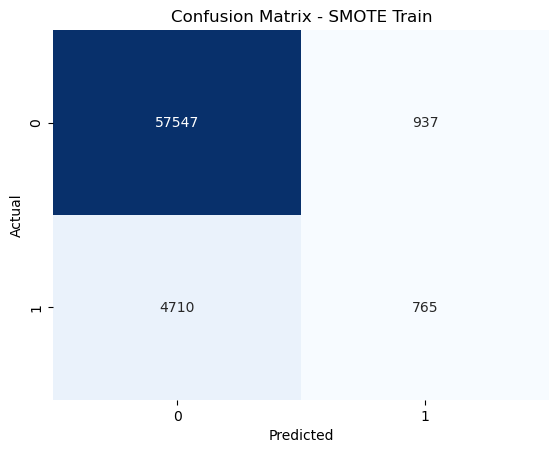

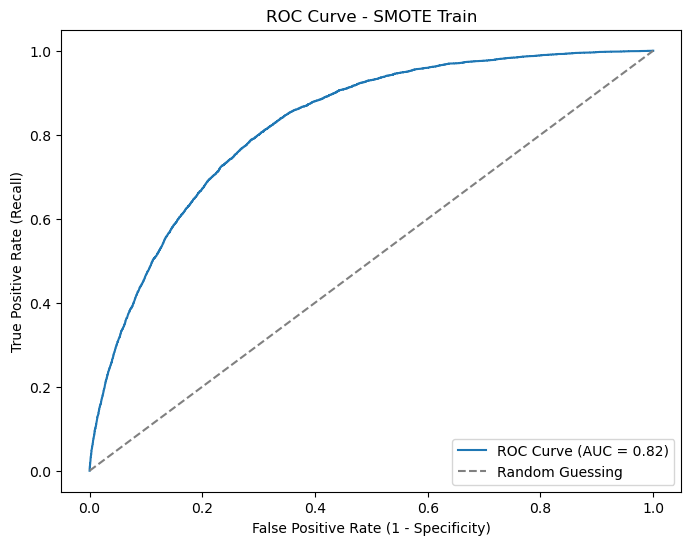

['XGB_BRFSSfinal.pkl']

In [18]:
import joblib
# Save the evaluation metrics for all models
model_result = {}

# Build XGB Classifier model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
C_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

print(f"Model: XGB Classifier (SMOTE Train, Original Test)")
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{C_report}\n")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Store results
model_result['XGB (SMOTE)'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Specificity': specificity,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SMOTE Train")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - SMOTE Train")
plt.legend(loc="lower right")
plt.show()
import joblib
joblib.dump(model, 'XGB_BRFSSfinal.pkl')

In [19]:
print(X.columns.tolist())
print(f"Total input features: {len(X.columns)}")

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)']
Total input features: 25


In [20]:
X.head()        # shows sample input
X.shape   

(319795, 25)

In [21]:
X.dtypes

BMI                                    int64
Smoking                                int64
AlcoholDrinking                        int64
Stroke                                 int64
PhysicalHealth                         int64
MentalHealth                           int64
DiffWalking                            int64
Sex                                    int64
AgeCategory                            int64
PhysicalActivity                       int64
GenHealth                              int64
SleepTime                              int64
Asthma                                 int64
KidneyDisease                          int64
SkinCancer                             int64
Race_American Indian/Alaskan Native    int64
Race_Asian                             int64
Race_Black                             int64
Race_Hispanic                          int64
Race_Other                             int64
Race_White                             int64
Diabetic_No                            int64
Diabetic_N

In [22]:
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [24]:
with open('feature_names.txt', 'w') as f:
    for col in X.columns:
        f.write(f"{col}\n")

In [25]:
import numpy as np
import pandas as pd
import joblib

# Load model and scaler
model = joblib.load("XGB_BRFSSfinal.pkl")
scaler = joblib.load("scaler.pkl")

# Load feature names
with open("feature_names.txt") as f:
    feature_names = [line.strip() for line in f]

# Define the input
input_dict = {
    'BMI': 24,
    'Smoking': 0,
    'AlcoholDrinking': 0,
    'Stroke': 0,
    'PhysicalHealth': 0,
    'MentalHealth': 0,
    'DiffWalking': 0,
    'Sex': 0,
    'AgeCategory': 2,
    'PhysicalActivity': 1,
    'GenHealth': 4,
    'SleepTime': 8,
    'Asthma': 0,
    'KidneyDisease': 0,
    'SkinCancer': 0,
    'Race_American Indian/Alaskan Native': 0,
    'Race_Asian': 0,
    'Race_Black': 0,
    'Race_Hispanic': 0,
    'Race_Other': 0,
    'Race_White': 1,
    'Diabetic_No': 1,
    'Diabetic_No, borderline diabetes': 0,
    'Diabetic_Yes': 0,
    'Diabetic_Yes (during pregnancy)': 0
}

# Convert to DataFrame in correct order
input_df = pd.DataFrame([[input_dict[col] for col in feature_names]], columns=feature_names)

# Scale the input
input_scaled = scaler.transform(input_df)

# Predict
prediction = model.predict(input_scaled)[0]
print("Prediction:", prediction)


Prediction: 0


In [26]:
proba = model.predict_proba(input_scaled)[0]
print(f"Probability of Low Risk (0): {proba[0]:.2f}")
print(f"Probability of High Risk (1): {proba[1]:.2f}")

Probability of Low Risk (0): 1.00
Probability of High Risk (1): 0.00


In [27]:
import numpy as np
import pandas as pd
import joblib

# Load model and scaler
model = joblib.load("XGB_BRFSSfinal.pkl")
scaler = joblib.load("scaler.pkl")

# Load feature names
with open("feature_names.txt") as f:
    feature_names = [line.strip() for line in f]

input_dict = {
    'BMI': 38,  # Obese
    'Smoking': 1,
    'AlcoholDrinking': 1,
    'Stroke': 1,
    'PhysicalHealth': 20,
    'MentalHealth': 25,
    'DiffWalking': 1,
    'Sex': 1,  # Male (slightly higher risk in some datasets)
    'AgeCategory': 12,  # '80 or older'
    'PhysicalActivity': 0,
    'GenHealth': 0,  # 'Poor'
    'SleepTime': 3,
    'Asthma': 1,
    'KidneyDisease': 1,
    'SkinCancer': 0,
    'Race_American Indian/Alaskan Native': 0,
    'Race_Asian': 0,
    'Race_Black': 1,
    'Race_Hispanic': 0,
    'Race_Other': 0,
    'Race_White': 0,
    'Diabetic_No': 0,
    'Diabetic_No, borderline diabetes': 0,
    'Diabetic_Yes': 1,
    'Diabetic_Yes (during pregnancy)': 0
}


# Convert to DataFrame in correct order
input_df = pd.DataFrame([[input_dict[col] for col in feature_names]], columns=feature_names)

# Scale the input
input_scaled = scaler.transform(input_df)

# Predict
prediction = model.predict(input_scaled)[0]
print("Prediction:", prediction)


Prediction: 1
